### Imports

In [1]:
# for k means implementation
import pandas as pd
import numpy as np

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

# for testing k means function
from sklearn.datasets import make_blobs


# KMeans Implementation

K-Means algorithm:

> Step 1. Pick n-randomly-picked-points in the dataset as the initial mean

> Step 2. Partition the datasets into n-clusters by finding the nearest mean (using Euclidean distance)

> Step 3. Find centroid of individual clusters (mean_value for x and y)

> Step 4. Repeat step 2 and 3 until convergence



In [2]:
# simple k_means function with the default number of clusters set to 3
def kmeans(df, n_clusters = 3):
    data_size = len(df)

    # randomly pick n number of points as for the initial clustering
    initial_means = []
    for i in range(n_clusters):
        initial_means.append(tuple(df[['x','y']].iloc[np.random.randint(0, data_size)]))
    
    # iteration number && conditional for while loop
    iter = 0
    same = False
    centroids = []
    
    while same == False:
        # initialize centroids list, set to initial means if before first iteration.
        # calculates centroids for individual clusters, compare to previous centroids.
        # if less that 1% change from previous centroids' position, we consider the centroids has converged. 
        # print out the iteration number and the centroid list
        
        if iter == 0:
            centroids = initial_means
        else:
            centroids_update = [] 
            for i in range(n_clusters):
                centroid_x = df[df['cluster_id'] == i].x.mean()
                centroid_y = df[df['cluster_id'] == i].y.mean()
                centroids_update.append((centroid_x,centroid_y))
            if np.mean(np.abs((np.array(centroids_update) - np.array(centroids))/np.array(centroids))) > 0.01:
                centroids = centroids_update
            else: same = True
        print(f'iteration {iter}: centroids are {centroids}')
        
        # calculates the distance of each points from each centroid
        for i,c in enumerate(centroids):
            df_temp = (df[['x','y']]-c)**2
            df[i] = np.sqrt(df_temp.apply(np.sum,axis = 1))

        # get the new cluster classification by using transposing the distance matrix and finding the index of the min
        new_id = []
        for i in range(len(df)):
            new_id.append(df[[0,1,2]].T[i].idxmin())

        # check to see if the new cluster is the same as before, if yes, end the loop, if not. set it as the cluster_id and proceed to next iteration
        if iter == 0:
            df['cluster_id'] = pd.Series(new_id)
        else:
            df.cluster_id = pd.Series(new_id)
        iter += 1

    return df[['x','y','cluster_id']]

# Testing and Visualization

Test set created using sklearn's make_blob function
and visualized using a basic scatterplot

In [3]:
# creating a dataframe of 200 points.
sample = make_blobs(n_samples=200, n_features=2)
df = pd.DataFrame(sample[0],columns = ['x','y'])
clustering = pd.DataFrame(sample[1])

<AxesSubplot:xlabel='x', ylabel='y'>

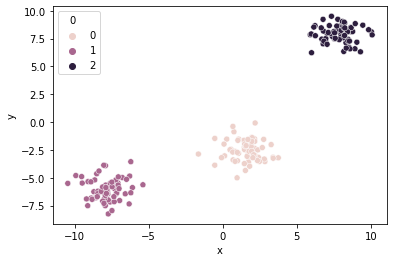

In [4]:
# visualise the clustering based on the clustering provided by make blob
sns.scatterplot(x=df['x'],y=df['y'], hue = clustering[0])

In [5]:
#testing the method
df_new = kmeans(df)

iteration 0: centroids are [(-7.210067518929101, -5.195465297252489), (-8.501961112295772, -4.636075692569411), (-7.041731859385852, -4.915353938514405)]
iteration 1: centroids are [(-7.532584200036859, -6.387608165193524), (-8.924391260755142, -5.604140496628948), (4.2171777311873635, 2.3010333306344752)]
iteration 2: centroids are [(-7.141865576433554, -6.0874469424751885), (-8.924391260755142, -5.604140496628948), (4.7826086139814485, 2.714780732222177)]
iteration 3: centroids are [(-6.699220489548151, -5.972760601416702), (-8.800410100630597, -5.775495360862226), (4.849764008935511, 2.820394225452577)]
iteration 4: centroids are [(-6.1652836091333505, -5.731189153029338), (-8.516529715640766, -6.02274265439176), (4.886643193896245, 2.8660968045311264)]
iteration 5: centroids are [(-4.641757909080661, -5.122879909052142), (-8.238256457651643, -6.156229245394118), (4.9792905188185825, 3.0249497139110004)]
iteration 6: centroids are [(-0.6350955027235917, -3.5112289126368124), (-7.968

<AxesSubplot:xlabel='x', ylabel='y'>

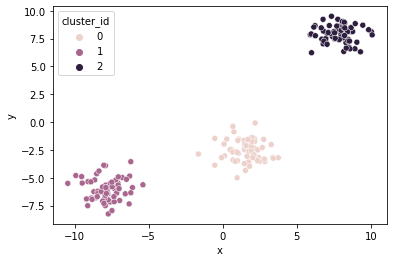

In [6]:
#visualizing the the clustering via seaborn scatterplot
sns.scatterplot(x=df_new['x'],y=df_new['y'], hue = df_new['cluster_id'])